!pip install textsearch
!pip install contractions
!pip install textsearch
!pip install --user gensim

In [706]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import MiniBatchKMeans
import datetime
from datetime import datetime

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [280]:
#add path from your computer
df = pd.read_csv('Internship_Assignment.csv',encoding= 'unicode_escape',dtype=str)
df.head()

,NAME,WEBSITE,TAGLINE,HQ REGION,HQ COUNTRY,HQ CITY,TAGS,LAUNCH DATE,GROWTH STAGE,LINKEDIN,TYPE
0,63336,http://63336.com,Ai-enabled q&a service that answers to various...,Europe,United Kingdom,London,mobile,"2002, September",late growth stage,NaN,NaN
1,@Futsal,http://futsaluk.net,Educational courses through the medium of spor...,Europe,United Kingdom,Birmingham,NaN,2008,early growth stage,https://www.linkedin.com/company/-futsal-group...,NaN
2,#5 Magazine,http://5mag.co,Multi-platform digital lifestyle magazines abo...,Europe,United Kingdom,London,publishing;branding;media;platform;entertainment,2007,NaN,NaN,NaN
3,03Numbers,http://planet-numbers.co.uk/numbers/0333,Planet Numbers are the leading provider of 03 ...,Europe,United Kingdom,NaN,NaN,"2008, September",early growth stage,http://www.linkedin.com/company/planet-numbers,NaN
4,077football News & Media,http://077football.com,"077Football - the deep-rooted, hyperlocal foot...",Europe,United Kingdom,Cambridge,sport;advertising;football;network;game develo...,2009,late growth stage,https://www.linkedin.com/company/077football-n...,NaN


In [281]:
df_new = df[['NAME', 'TAGLINE', 'TAGS', 'LAUNCH DATE']]
df_new.TAGLINE.fillna('', inplace=True)
df_new.TAGS.fillna('', inplace=True)
df_new['text'] = df_new['TAGLINE'].map(str) + ' ' + df_new['TAGS']
df_new.dropna(inplace=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11582 entries, 0 to 11581
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NAME         11582 non-null  object
 1   TAGLINE      11582 non-null  object
 2   TAGS         11582 non-null  object
 3   LAUNCH DATE  11582 non-null  object
 4   text         11582 non-null  object
dtypes: object(5)
memory usage: 542.9+ KB


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [282]:
df_new.head(10)

,NAME,TAGLINE,TAGS,LAUNCH DATE,text
0,63336,Ai-enabled q&a service that answers to various...,mobile,"2002, September",Ai-enabled q&a service that answers to various...
1,@Futsal,Educational courses through the medium of spor...,,2008,Educational courses through the medium of spor...
2,#5 Magazine,Multi-platform digital lifestyle magazines abo...,publishing;branding;media;platform;entertainment,2007,Multi-platform digital lifestyle magazines abo...
3,03Numbers,Planet Numbers are the leading provider of 03 ...,,"2008, September",Planet Numbers are the leading provider of 03 ...
4,077football News & Media,"077Football - the deep-rooted, hyperlocal foot...",sport;advertising;football;network;game develo...,2009,"077Football - the deep-rooted, hyperlocal foot..."
5,077football News & Media Limited,"A football (soccer) centric, community-specifi...",publishing;game development;social;advertising...,2009,"A football (soccer) centric, community-specifi..."
6,1 Click Services Limited,"We provide out of the box hosted solutions, ma...",cloud technology,"2008, June","We provide out of the box hosted solutions, ma..."
7,1 Fix Limited,1-Fix provide a complete range of IT solutions...,adtech;hardware,2002,1-Fix provide a complete range of IT solutions...
8,1 Stop Data,Providing UK and International business postal...,data;reporting;database;cloud technology,2001,Providing UK and International business postal...
9,10 Creative,We're an award-winning creative design agency ...,design;printing;lighting;led lighting,2002,We're an award-winning creative design agency ...


In [283]:
import nltk
import re
import numpy as np
import contractions

#for removing stopwords
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    doc = contractions.fix(doc)
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    #filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(list(df_new['text']))
len(norm_corpus)

11582

In [285]:
from gensim.models import FastText

tokenized_docs = [doc.split() for doc in norm_corpus]
ft_model = FastText(tokenized_docs, window=4, min_count=1, workers=4, sg=1, iter=100)

In [286]:
len(tokenized_docs)

11582

In [287]:
tokenized_docs

[['aienabled',
  'qa',
  'service',
  'answers',
  'various',
  'questions',
  'combination',
  'databases',
  'human',
  'researchers',
  'mobile'],
 ['educational',
  'courses',
  'medium',
  'sports',
  'children',
  'aged',
  '16',
  '18',
  'years'],
 ['multiplatform',
  'digital',
  'lifestyle',
  'magazines',
  'musicians',
  'actors',
  'publishingbrandingmediaplatformentertainment'],
 ['planet',
  'numbers',
  'leading',
  'provider',
  '03',
  'numbers',
  'uk',
  'require',
  'non',
  'geographical',
  '0330',
  '0333',
  'number',
  'business'],
 ['077football',
  'deeprooted',
  'hyperlocal',
  'football',
  'network',
  'sportadvertisingfootballnetworkgame',
  'developmentmediacommunitylocal'],
 ['football',
  'soccer',
  'centric',
  'communityspecific',
  'news',
  'information',
  'audience',
  'interaction',
  'engagement',
  'network',
  'publishinggame',
  'developmentsocialadvertisingadtechsharing',
  'economymobilefreelancerstradingmediawealth',
  'managementcommu

In [288]:
def averaged_word2vec_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    
    def average_word_vectors(words, model, vocabulary, num_features):
        feature_vector = np.zeros((num_features,), dtype="float64")
        nwords = 0.
        
        for word in words:
            if word in vocabulary: 
                nwords = nwords + 1.
                feature_vector = np.add(feature_vector, model.wv[word])
        if nwords:
            feature_vector = np.divide(feature_vector, nwords)

        return feature_vector

    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [289]:
doc_vecs_ft = averaged_word2vec_vectorizer(tokenized_docs, ft_model, 100)
doc_vecs_ft.shape

(11582, 100)

In [702]:
#for knowing optimal cluters and plotting the cluster plot using pca and tsne
tfidf = TfidfVectorizer(
    min_df = 0.01,
    stop_words = 'english'
)
tfidf.fit(df_new.TAGLINE)
text = tfidf.transform(df_new.text)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters


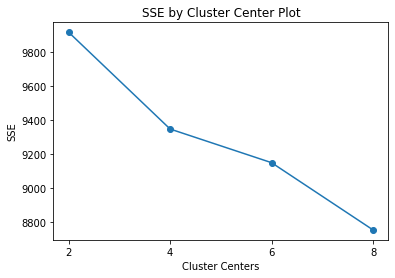

In [709]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 8)

In [695]:
NUM_CLUSTERS = 5
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=10000, n_init=100, random_state=42).fit_predict(doc_vecs_ft)
km.shape

(11582,)

In [637]:
print(km)

[2 2 2 ... 4 0 0]


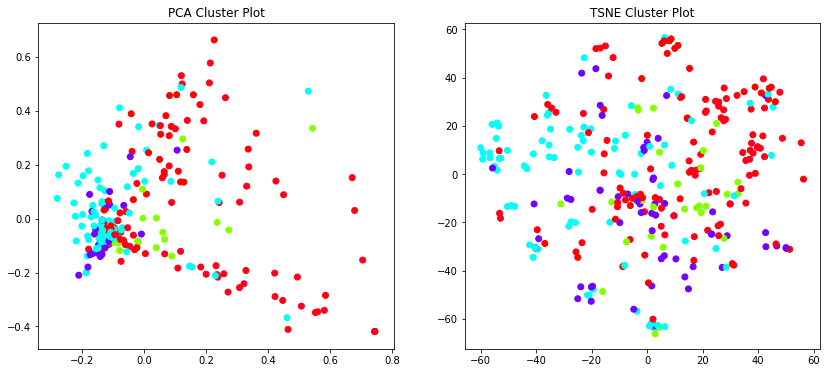

In [704]:
# for visualisation 
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, km)

In [698]:
df['kmeans_cluster'] = km
df.head()
df.to_csv("clustering.csv")

In [638]:
df_new['kmeans_cluster'] = km
df_new.head()

,NAME,TAGLINE,TAGS,LAUNCH DATE,text,kmeans_cluster,date
0,63336,Ai-enabled q&a service that answers to various...,mobile,"2002, September",Ai-enabled q&a service that answers to various...,2,2002-09-01
1,@Futsal,Educational courses through the medium of spor...,,2008,Educational courses through the medium of spor...,2,2008-01-01
2,#5 Magazine,Multi-platform digital lifestyle magazines abo...,publishing;branding;media;platform;entertainment,2007,Multi-platform digital lifestyle magazines abo...,2,2007-01-01
3,03Numbers,Planet Numbers are the leading provider of 03 ...,,"2008, September",Planet Numbers are the leading provider of 03 ...,4,2008-09-01
4,077football News & Media,"077Football - the deep-rooted, hyperlocal foot...",sport;advertising;football;network;game develo...,2009,"077Football - the deep-rooted, hyperlocal foot...",2,2009-01-01


In [641]:
df.groupby(df_new['kmeans_cluster']).count()

,NAME,WEBSITE,TAGLINE,HQ REGION,HQ COUNTRY,HQ CITY,TAGS,LAUNCH DATE,GROWTH STAGE,LINKEDIN,TYPE,date
kmeans_cluster,,,,,,,,,,,,
0,1758,1758,1742,1758,1758,1667,1550,1758,1406,1447,0,1758
1,922,922,898,922,922,865,853,922,698,764,0,922
2,3236,3236,3224,3236,3236,3078,2647,3236,2272,2299,0,3233
3,2234,2234,2221,2234,2234,2080,1713,2234,1737,1376,0,2234
4,3432,3432,3368,3432,3432,3218,2830,3432,2471,2710,0,3432


In [642]:
# cluster wise company name
for cluster_num in range(NUM_CLUSTERS):
    company = comp_clusters[comp_clusters['kmeans_cluster'] == cluster_num]['NAME'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1))
    print('Popular :', company)
    print('-'*80)

CLUSTER #1
Popular : ['DigitalMR', 'Ellen MacArthur Foundation', 'Tictrac', 'DAX Automation', 'Who Can Fix My Car', 'EarPeace', 'GarageFarm.NET Render Farm', 'Nottingham Hackspace', 'Dognaedis', 'Lexpertia', 'Molplex', 'Aquaa Partners', 'Massive Analytic', 'Sphere Fluidics', 'Heckyl', 'Aerial Motion Pictures', 'Anvil Semiconductors', 'Purple Harry', 'Abcodia', 'Active Minds', 'ADC Biotechnology', 'Advatech Health Care Europe Ltd.', 'Aggregated Micro Power Holdings', 'AlgaeCytes', 'ALGAentis- a USA C-Corp. UK LTD corp.', 'Allsafe Security Alarms Ltd.', 'American Energy Development Corp', 'Anesco', 'Antidote.me', 'Applied Graphene Materials']
--------------------------------------------------------------------------------
CLUSTER #2
Popular : ['Bilbus', 'Cube Legal', 'FundApps', 'Hampton Court Capital', 'Money Transfer Application', 'Moneyscope', 'saveitbuddy.com', 'Comparaencasa', 'MobileQuid', 'RateSetter', 'Ancoa', 'Carbon Calculated', 'Quotall', 'BinaryOptionsExplained.com', 'MahiFX'

In [643]:
#cluster1
arr=np.where(km==0) ## index of docs in cluster 1
km[arr]
cluster1=df_new.iloc[arr]  ## all docs in cluster 1
#print cluster1['text', 'tags','kmeans_cluster', 'LAUNCH DATE'])
print(cluster1.columns)   
cluster1

Index(['NAME', 'TAGLINE', 'TAGS', 'LAUNCH DATE', 'text', 'kmeans_cluster',
       'date'],
      dtype='object')


,NAME,TAGLINE,TAGS,LAUNCH DATE,text,kmeans_cluster,date
23,123ManandVan - Movers & Storage,Movers & storage are a company dedicated to mo...,storage;local;moving services;packaging and co...,"2005, April",Movers & storage are a company dedicated to mo...,0,2005-04-01
29,1Cold Ltd,"Industrial Chillers, Refrigeration & Cold Room...",manufacturing;room;refrigeration;industrial,2005,"Industrial Chillers, Refrigeration & Cold Room...",0,2005-01-01
42,20:20 Mobile,Serving Wireless | Brightstar Corp.,mobile;shopping;media;finance;retail;mapping;n...,"2006, September",Serving Wireless | Brightstar Corp. mobile;sho...,0,2006-09-01
44,299 Lighting,Architectural Lighting & Office Lighting Desig...,delivery;design;lighting;office space,2009,Architectural Lighting & Office Lighting Desig...,0,2009-01-01
48,2DHeat,They are a researcdh and development company c...,electric energy,"2004, April",They are a researcdh and development company c...,0,2004-04-01
...,...,...,...,...,...,...,...
11576,Zycko,A UK-based distributor of IT solutions,monitoring;data;video;augmented reality;deep t...,1999,A UK-based distributor of IT solutions monitor...,0,1999-01-01
11577,Zyentia,"Biotech company, focuses on protein folding, c...",biotechnology;diabetes;health;mortgages & lend...,2002,"Biotech company, focuses on protein folding, c...",0,2002-01-01
11578,Zyex,"Zyex providing monofilament, multifilament and...",industrial technologies;aviation & aerospace,1994,"Zyex providing monofilament, multifilament and...",0,1994-01-01
11580,Zytronic,Zytronic are developers and manufacturers of p...,deep tech;industrial technologies;recognition ...,1999,Zytronic are developers and manufacturers of p...,0,1999-01-01


In [645]:
#as the tokenised words or documents within cluster has no related meaning with each other
cluster1['type']=cluster1['kmeans_cluster'].apply(lambda x: 'unclassified' if x == 0 else 'bug')
cluster1.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,NAME,TAGLINE,TAGS,LAUNCH DATE,text,kmeans_cluster,date,type
23,123ManandVan - Movers & Storage,Movers & storage are a company dedicated to mo...,storage;local;moving services;packaging and co...,"2005, April",Movers & storage are a company dedicated to mo...,0,2005-04-01,unclassified
29,1Cold Ltd,"Industrial Chillers, Refrigeration & Cold Room...",manufacturing;room;refrigeration;industrial,2005,"Industrial Chillers, Refrigeration & Cold Room...",0,2005-01-01,unclassified
42,20:20 Mobile,Serving Wireless | Brightstar Corp.,mobile;shopping;media;finance;retail;mapping;n...,"2006, September",Serving Wireless | Brightstar Corp. mobile;sho...,0,2006-09-01,unclassified
44,299 Lighting,Architectural Lighting & Office Lighting Desig...,delivery;design;lighting;office space,2009,Architectural Lighting & Office Lighting Desig...,0,2009-01-01,unclassified
48,2DHeat,They are a researcdh and development company c...,electric energy,"2004, April",They are a researcdh and development company c...,0,2004-04-01,unclassified


In [646]:
arr=np.where(km==1) ## index of docs in cluster 2
km[arr]
cluster2=df_new.iloc[arr]  ## all docs in cluster 2
#print cluster1['text', 'tags','kmeans_cluster', 'LAUNCH DATE'])
print(cluster2.columns)   
cluster2

Index(['NAME', 'TAGLINE', 'TAGS', 'LAUNCH DATE', 'text', 'kmeans_cluster',
       'date'],
      dtype='object')


,NAME,TAGLINE,TAGS,LAUNCH DATE,text,kmeans_cluster,date
24,123Send,Face to face and online card payment processin...,mobile;payment;retail,1999,Face to face and online card payment processin...,1,1999-01-01
27,192business,Identity Fraud Solutions | Identity & Fraud | ...,fintech;solution;fraud management;identity man...,2002,Identity Fraud Solutions | Identity & Fraud | ...,1,2002-01-01
31,1pm plc,"Specialist in the industry, offering asset fin...",invoicing;accounting;finance,2006,"Specialist in the industry, offering asset fin...",1,2006-01-01
39,1st Stop Group,Offers a range of financial services to the re...,finance;car;retail;financial;mortgages & lending,"2004, June",Offers a range of financial services to the re...,1,2004-06-01
43,24DrTravel,Information to the travelling public,finance;insurtech,2001,Information to the travelling public finance;i...,1,2001-01-01
...,...,...,...,...,...,...,...
11535,Zensify,Investment company providing capital and start...,,2006,Investment company providing capital and start...,1,2006-01-01
11539,Zeta Compliance Group,Zeta Compliance Group engages in the provision...,consulting services;compliance;water;cleantech...,2008,Zeta Compliance Group engages in the provision...,1,2008-01-01
11540,ZetaSafe,"Global leader in quality, safety, compliance a...",software;data;compliance;risk management;risk;...,2003,"Global leader in quality, safety, compliance a...",1,2003-01-01
11556,Zomaron,Credit and debit card processing solutions,fintech,2008,Credit and debit card processing solutions fin...,1,2008-01-01


In [691]:
# as all these are related to the finance and risk for which entity is not defined
cluster2['type']=cluster2['kmeans_cluster'].apply(lambda x: 'unclassified' if x == 1 else 'bug')
cluster2.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,NAME,TAGLINE,TAGS,LAUNCH DATE,text,kmeans_cluster,date,type
24,123Send,Face to face and online card payment processin...,mobile;payment;retail,1999,Face to face and online card payment processin...,1,1999-01-01,unclassified
27,192business,Identity Fraud Solutions | Identity & Fraud | ...,fintech;solution;fraud management;identity man...,2002,Identity Fraud Solutions | Identity & Fraud | ...,1,2002-01-01,unclassified
31,1pm plc,"Specialist in the industry, offering asset fin...",invoicing;accounting;finance,2006,"Specialist in the industry, offering asset fin...",1,2006-01-01,unclassified
39,1st Stop Group,Offers a range of financial services to the re...,finance;car;retail;financial;mortgages & lending,"2004, June",Offers a range of financial services to the re...,1,2004-06-01,unclassified
43,24DrTravel,Information to the travelling public,finance;insurtech,2001,Information to the travelling public finance;i...,1,2001-01-01,unclassified


In [647]:
arr=np.where(km==2) ## index of docs in cluster 3
km[arr]
cluster3=df_new.iloc[arr]  ## all docs in cluster 3

In [660]:
# as the tokenised words are similar to schools education, friends and similar tags
cluster3['type']=cluster3['kmeans_cluster'].apply(lambda x: 'schools/University' if x == 2 else 'bug')
cluster3.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,NAME,TAGLINE,TAGS,LAUNCH DATE,text,kmeans_cluster,date,type
0,63336,Ai-enabled q&a service that answers to various...,mobile,"2002, September",Ai-enabled q&a service that answers to various...,2,2002-09-01,schools/University
1,@Futsal,Educational courses through the medium of spor...,,2008,Educational courses through the medium of spor...,2,2008-01-01,schools/University
2,#5 Magazine,Multi-platform digital lifestyle magazines abo...,publishing;branding;media;platform;entertainment,2007,Multi-platform digital lifestyle magazines abo...,2,2007-01-01,schools/University
4,077football News & Media,"077Football - the deep-rooted, hyperlocal foot...",sport;advertising;football;network;game develo...,2009,"077Football - the deep-rooted, hyperlocal foot...",2,2009-01-01,schools/University
5,077football News & Media Limited,"A football (soccer) centric, community-specifi...",publishing;game development;social;advertising...,2009,"A football (soccer) centric, community-specifi...",2,2009-01-01,schools/University


In [649]:
arr=np.where(km==3) ## index of docs in cluster 4
km[arr]
cluster4=df_new.iloc[arr]  ## all docs in cluster 4

In [658]:
arr=np.where(km==4) ## index of docs in cluster 5
km[arr]
cluster5=df_new.iloc[arr] 
## all docs in cluster 5

cluster5.head()

,NAME,TAGLINE,TAGS,LAUNCH DATE,text,kmeans_cluster,date
3,03Numbers,Planet Numbers are the leading provider of 03 ...,,"2008, September",Planet Numbers are the leading provider of 03 ...,4,2008-09-01
6,1 Click Services Limited,"We provide out of the box hosted solutions, ma...",cloud technology,"2008, June","We provide out of the box hosted solutions, ma...",4,2008-06-01
7,1 Fix Limited,1-Fix provide a complete range of IT solutions...,adtech;hardware,2002,1-Fix provide a complete range of IT solutions...,4,2002-01-01
11,100%Open,Specialist open innovation agency that helps l...,cancer;oncology;delivery;design;risk managemen...,2009,Specialist open innovation agency that helps l...,4,2009-01-01
14,1060 Research Limited,1060 Research develops and reinvents software ...,software;research,2002,1060 Research develops and reinvents software ...,4,2002-01-01


In [659]:
#as the tokenised words are related to the public,research and similar tags
cluster5['type']=cluster5['kmeans_cluster'].apply(lambda x: 'Government/Non-profit' if x == 4 else 'bug')
cluster5.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,NAME,TAGLINE,TAGS,LAUNCH DATE,text,kmeans_cluster,date,type
3,03Numbers,Planet Numbers are the leading provider of 03 ...,,"2008, September",Planet Numbers are the leading provider of 03 ...,4,2008-09-01,Government/Non-profit
6,1 Click Services Limited,"We provide out of the box hosted solutions, ma...",cloud technology,"2008, June","We provide out of the box hosted solutions, ma...",4,2008-06-01,Government/Non-profit
7,1 Fix Limited,1-Fix provide a complete range of IT solutions...,adtech;hardware,2002,1-Fix provide a complete range of IT solutions...,4,2002-01-01,Government/Non-profit
11,100%Open,Specialist open innovation agency that helps l...,cancer;oncology;delivery;design;risk managemen...,2009,Specialist open innovation agency that helps l...,4,2009-01-01,Government/Non-profit
14,1060 Research Limited,1060 Research develops and reinvents software ...,software;research,2002,1060 Research develops and reinvents software ...,4,2002-01-01,Government/Non-profit


In [651]:
#define cluster no for which cluster you want the results of tokinize
cluster5=str(cluster5[['text']])
# removes punctuation and returns list of words
tokenizer = RegexpTokenizer(r'\w+')
zen_no_punc = tokenizer.tokenize(cluster5)#initialize cluster no for which you want tokens

In [652]:
#hash_map for tokenized word
from collections import Counter
word_count_dict = Counter(w.title() for w in zen_no_punc if w.lower() not in stopwords.words())
word_count_dict.most_common()

[('Software', 4),
 ('Provide', 2),
 ('Solutions', 2),
 ('1', 2),
 ('Text', 1),
 ('3', 1),
 ('Planet', 1),
 ('Numbers', 1),
 ('Leading', 1),
 ('Provider', 1),
 ('03', 1),
 ('6', 1),
 ('Box', 1),
 ('Hosted', 1),
 ('7', 1),
 ('Fix', 1),
 ('Complete', 1),
 ('Range', 1),
 ('11', 1),
 ('Specialist', 1),
 ('Open', 1),
 ('Innovation', 1),
 ('Agency', 1),
 ('Helps', 1),
 ('14', 1),
 ('1060', 1),
 ('Research', 1),
 ('Develops', 1),
 ('Reinvents', 1),
 ('11561', 1),
 ('Cheap', 1),
 ('Hosting', 1),
 ('Service', 1),
 ('Good', 1),
 ('Support', 1),
 ('Facili', 1),
 ('11567', 1),
 ('Domain', 1),
 ('11570', 1),
 ('Home', 1),
 ('Page', 1),
 ('Zoral', 1),
 ('Labs', 1),
 ('Subscription', 1),
 ('11575', 1),
 ('Zuztertu', 1),
 ('Mobile', 1),
 ('Learning', 1),
 ('Apps', 1),
 ('Solution', 1),
 ('11579', 1),
 ('Sage', 1),
 ('Integration', 1),
 ('Zynk', 1),
 ('Commerce', 1),
 ('3432', 1),
 ('Rows', 1),
 ('X', 1),
 ('Columns', 1)]

In [653]:
df_new.head()

,NAME,TAGLINE,TAGS,LAUNCH DATE,text,kmeans_cluster,date
0,63336,Ai-enabled q&a service that answers to various...,mobile,"2002, September",Ai-enabled q&a service that answers to various...,2,2002-09-01
1,@Futsal,Educational courses through the medium of spor...,,2008,Educational courses through the medium of spor...,2,2008-01-01
2,#5 Magazine,Multi-platform digital lifestyle magazines abo...,publishing;branding;media;platform;entertainment,2007,Multi-platform digital lifestyle magazines abo...,2,2007-01-01
3,03Numbers,Planet Numbers are the leading provider of 03 ...,,"2008, September",Planet Numbers are the leading provider of 03 ...,4,2008-09-01
4,077football News & Media,"077Football - the deep-rooted, hyperlocal foot...",sport;advertising;football;network;game develo...,2009,"077Football - the deep-rooted, hyperlocal foot...",2,2009-01-01


In [681]:
df_classify=pd.concat([cluster1,cluster4], ignore_index=True)

In [682]:
#creating new column in datetime format for classification of startup and mature companies
df_classify['date']=pd.to_datetime(df_new['date'],errors='coerce')
df_new.head()

,NAME,TAGLINE,TAGS,LAUNCH DATE,text,kmeans_cluster,date
0,63336,Ai-enabled q&a service that answers to various...,mobile,"2002, September",Ai-enabled q&a service that answers to various...,2,2002-09-01
1,@Futsal,Educational courses through the medium of spor...,,2008,Educational courses through the medium of spor...,2,2008-01-01
2,#5 Magazine,Multi-platform digital lifestyle magazines abo...,publishing;branding;media;platform;entertainment,2007,Multi-platform digital lifestyle magazines abo...,2,2007-01-01
3,03Numbers,Planet Numbers are the leading provider of 03 ...,,"2008, September",Planet Numbers are the leading provider of 03 ...,4,2008-09-01
4,077football News & Media,"077Football - the deep-rooted, hyperlocal foot...",sport;advertising;football;network;game develo...,2009,"077Football - the deep-rooted, hyperlocal foot...",2,2009-01-01


In [683]:
some_date='1990-01-01' #classification for companies for mature and startup companies based on launch date

In [684]:
date_before= datetime.strptime(some_date,'%Y-%m-%d')

In [685]:
df_classify['type']=np.where((df_classify['date'] < some_date), 'mature_company', 'startup_company')


In [686]:
df_classify.head(25)

,NAME,TAGLINE,TAGS,LAUNCH DATE,text,kmeans_cluster,date,type
0,123ManandVan - Movers & Storage,Movers & storage are a company dedicated to mo...,storage;local;moving services;packaging and co...,"2005, April",Movers & storage are a company dedicated to mo...,0,2002-09-01,startup_company
1,1Cold Ltd,"Industrial Chillers, Refrigeration & Cold Room...",manufacturing;room;refrigeration;industrial,2005,"Industrial Chillers, Refrigeration & Cold Room...",0,2008-01-01,startup_company
2,20:20 Mobile,Serving Wireless | Brightstar Corp.,mobile;shopping;media;finance;retail;mapping;n...,"2006, September",Serving Wireless | Brightstar Corp. mobile;sho...,0,2007-01-01,startup_company
3,299 Lighting,Architectural Lighting & Office Lighting Desig...,delivery;design;lighting;office space,2009,Architectural Lighting & Office Lighting Desig...,0,2008-09-01,startup_company
4,2DHeat,They are a researcdh and development company c...,electric energy,"2004, April",They are a researcdh and development company c...,0,2009-01-01,startup_company
5,2Nd Quadrant Limited,Professional PostgreSQL | 2ndQua...,software;innovation radar,2001,Professional PostgreSQL | 2ndQua...,0,2009-01-01,startup_company
6,3D Couriers,Specialist courier company,3d technology;deep tech;lighting;led lighting;...,2003,Specialist courier company 3d technology;deep ...,0,2008-06-01,startup_company
7,3D Creation Lab,3D Printing & Rapid Prototyping Services | 3D ...,3d printing;3d technology;manufacturing;deep t...,"2009, March",3D Printing & Rapid Prototyping Services | 3D ...,0,2002-01-01,startup_company
8,3D Laser Mapping,World-leading provider of mobile mapping and m...,3d technology;deep tech;mapping;navigation;mob...,1999,World-leading provider of mobile mapping and m...,0,2001-01-01,startup_company
9,3D Organisation Ltd,3D Organisation,3d printing;3d technology;manufacturing;deep t...,2003,3D Organisation 3d printing;3d technology;manu...,0,2002-01-01,startup_company


In [687]:
df_classify['type'].value_counts()

startup_company    3923
mature_company       69
Name: type, dtype: int64

In [692]:
df_final=pd.concat([cluster2,cluster3,df_classify,cluster5], ignore_index=True)

In [693]:
#final dataframe with type as entity being categorized
df_final.head(20)

,NAME,TAGLINE,TAGS,LAUNCH DATE,text,kmeans_cluster,date,type
0,123Send,Face to face and online card payment processin...,mobile;payment;retail,1999,Face to face and online card payment processin...,1,1999-01-01,unclassified
1,192business,Identity Fraud Solutions | Identity & Fraud | ...,fintech;solution;fraud management;identity man...,2002,Identity Fraud Solutions | Identity & Fraud | ...,1,2002-01-01,unclassified
2,1pm plc,"Specialist in the industry, offering asset fin...",invoicing;accounting;finance,2006,"Specialist in the industry, offering asset fin...",1,2006-01-01,unclassified
3,1st Stop Group,Offers a range of financial services to the re...,finance;car;retail;financial;mortgages & lending,"2004, June",Offers a range of financial services to the re...,1,2004-06-01,unclassified
4,24DrTravel,Information to the travelling public,finance;insurtech,2001,Information to the travelling public finance;i...,1,2001-01-01,unclassified
5,2MC,"Recognized leader in governance, risk, and com...",consulting services;compliance;risk management...,2009,"Recognized leader in governance, risk, and com...",1,2009-01-01,unclassified
6,3di Innovations,Financial data management consultancy speciali...,financial;management;data;helping;consulting s...,2002,Financial data management consultancy speciali...,1,2002-01-01,unclassified
7,4Sight Financial Software,,fintech,2003,fintech,1,2003-01-01,unclassified
8,A.A. Tejuoso &,Legal services in nigeria and sub-saharan afri...,intellectual property;design,1997,Legal services in nigeria and sub-saharan afri...,1,1997-01-01,unclassified
9,AAC Systems,AAC Systems is specialising in solutions for t...,software;data;insurtech;compliance;regtech com...,2006,AAC Systems is specialising in solutions for t...,1,2006-01-01,unclassified


In [694]:
#final result count
df_final['type'].value_counts()

startup_company          3923
Government/Non-profit    3432
schools/University       3236
unclassified              922
mature_company             69
Name: type, dtype: int64